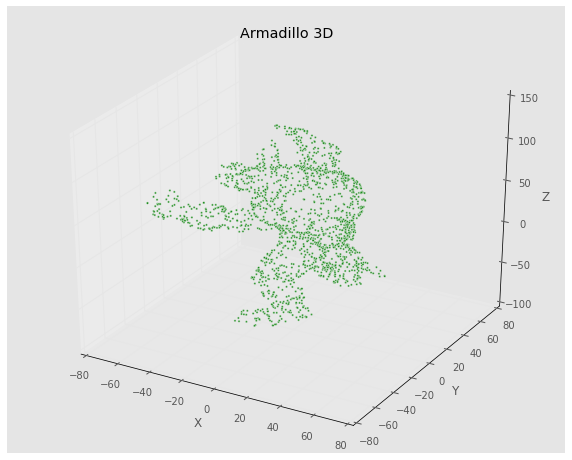

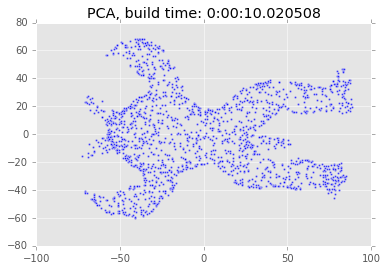

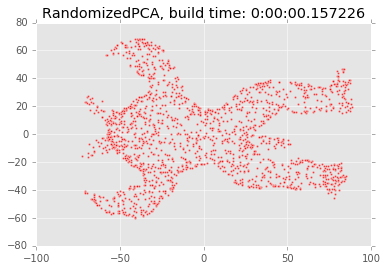

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import datetime
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from plyfile import PlyData, PlyElement


# Every 100 data samples, we save 1. If things run too
# slow, try increasing this number. If things run too fast,
# try decreasing it... =)
reduce_factor = 100


# Look pretty...
matplotlib.style.use('ggplot')


# Load up the scanned armadillo
plyfile = PlyData.read(r'C:\Users\aaaaaaaa\Desktop\edX ML\Module 4PCA\PCA\Datasets\stanford_armadillo.ply')
armadillo = pd.DataFrame({
  'x':plyfile['vertex']['z'][::reduce_factor],
  'y':plyfile['vertex']['x'][::reduce_factor],
  'z':plyfile['vertex']['y'][::reduce_factor]
})



def do_PCA(armadillo):
    from sklearn.decomposition import PCA  
    pca = PCA(n_components=2)                
    pca.fit(armadillo)
    T = pca.transform(armadillo)
    return T
  
  
    
def do_RandomizedPCA(armadillo):
    from sklearn.decomposition import RandomizedPCA
    pca = RandomizedPCA(n_components = 2)
    pca.fit(armadillo)
    T = pca.transform(armadillo)
    return T
  

# Render the Original Armadillo
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Armadillo 3D')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter(armadillo.x, armadillo.y, armadillo.z, c='green', marker='.', alpha=0.75)



# Render the newly transformed PCA armadillo!
t1 = datetime.datetime.now()
pca = do_PCA(armadillo)
time_delta = datetime.datetime.now() - t1
if not pca is None:
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.set_title('PCA, build time: ' + str(time_delta))
  ax.scatter(pca[:,0], pca[:,1], c='blue', marker='.', alpha=0.75)



# Render the newly transformed RandomizedPCA armadillo!
t1 = datetime.datetime.now()
rpca = do_RandomizedPCA(armadillo)
time_delta = datetime.datetime.now() - t1
if not rpca is None:
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.set_title('RandomizedPCA, build time: ' + str(time_delta))
  ax.scatter(rpca[:,0], rpca[:,1], c='red', marker='.', alpha=0.75)


plt.show()


